<h2><font size=6>Proyecto</font></h2>

<h1><font size=5> Comparación entre un modelo de Machine Learning y un modelo de Deep Learning</font></h1>
<br><br>
<div style="text-align: right">
<font  size=4>Carlos Eduardo Funes Betancourt</font><br>
<font  size=4>Machine Learning Avanzado con Python</font><br>

### Objetivo
- Construir un modelo de regresión lineal y un modelo de red neuronal simple.

- Evaluar la relación entre la reducción de sólidos y la demanda de oxígeno químico.

- Comparar los resultados obtenidos por ambos modelos en términos de error y capacidad predictiva.

- Comprender las ventajas y limitaciones de cada enfoque en un problema de predicción numérica.

## Cargar Librerias

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Datos de Entrada

Se generaron datos simulados que representan medidas de reducción de sólidos y demanda de oxígeno químico.

In [2]:
# datos de entrada
reduce_solid = np.array([3,7,11,15,18,27,29,30,30,31, # X
                         31,32,33,33,34,36,36,36,37,38,
                         39,39,39,40,41,42,42,43,44,45,
                         46,47,50], dtype=float)
# datos de entrenamiento y de predecir
reduce_demand_oxygen = np.array([5,11,21,16,16,28,27,25,35,30,  # y
                                40,32,34,32,34,37,38,34,36,38,
                                37,36,45,39,41,40,44,37, 44,46,
                                46,49,51], dtype=float)

- (reduce_solid): Reducción de sólidos, que es nuestra característica de entrada.
- (reduce_demand_oxygen): Demanda de oxígeno, que es nuestra variable objetivo.

In [3]:
X = reduce_solid.reshape(-1,1) # caracteristica de entrada
y = reduce_demand_oxygen  # nuestro target

se utiliza '.reshape(-1,1) ' para convertir los datos de entrada a la forma adecuada para el modelo

# Entrenar un modelo de Machine Learning (Regresión Lineal)

## Dividir los datos

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Determinar si el Modelo es Lineal o no

Text(0, 0.5, 'Residuos')

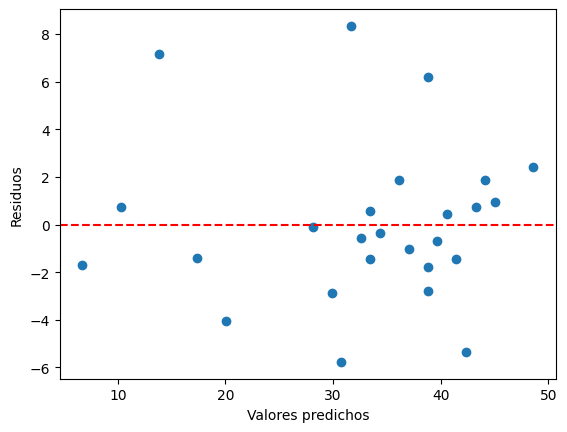

In [5]:
# Crear y entrenar el modelo de regresión lineal
lineal_model = LinearRegression()
lineal_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = lineal_model.predict(X_train)
y_pred_test = lineal_model.predict(X_test)

# Calcular los residuos
residuos = y_train - y_pred_train

# Visualizar los residuos
plt.scatter(y_pred_train, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')

In [6]:
# Si los residuos se distribuyen aleatoriamente alrededor de cero, se considera lineal
residual_model = LinearRegression()
residual_model.fit(y_pred_train.reshape(-1, 1), residuos)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Obtener el coeficiente de la regresion sobre los residuos
residual_slope = residual_model.coef_[0]
is_linear = np.abs(residual_slope) < 1e-5
print(f"El modelo es lineal: {is_linear}")

El modelo es lineal: True


podemos confirmar si los residuos (errores) están distribuidos aleatoriamente alrededor de 0. Esto nos da una idea de si el modelo capturó bien la linealidad.

##  Entrenar un Modelo de Machine Learning (ML)

In [8]:
# Hacer predicciones
lineal_model.fit(X_train, y_train)
y_pred_lineal = lineal_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lineal)
r2 = r2_score(y_test, y_pred_lineal)
print(f'MSE del modelo lineal: {mse:.2f}')
print(f'R² del modelo lineal: {r2:.2f}')

MSE del modelo lineal: 5.98
R² del modelo lineal: 0.83


## Visualización de los Datos

visualizamos la relaccion entre reduccion de solidos y demanda de oxigeno, ademas, visualizamos la linea de regresion que fue generado por el modelo (lineal_model.predict(X))

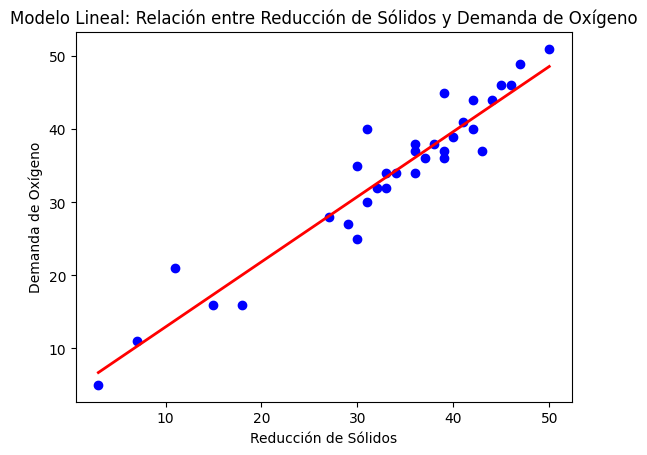

In [9]:
# Visualización de los datos originales y la línea de regresión
plt.scatter(reduce_solid, reduce_demand_oxygen, color='blue')
y_pred_lineal = lineal_model.predict(X)
plt.plot(X, y_pred_lineal, color='red', linewidth=2)
plt.title('Modelo Lineal: Relación entre Reducción de Sólidos y Demanda de Oxígeno')
plt.xlabel('Reducción de Sólidos')
plt.ylabel('Demanda de Oxígeno')
plt.show()

El modelo de Regresion lineal:

Se utilizo un modelo de regresion lineal para predecir la demanda de Oxygeno en funcion de la reduccion de solidos.

se considero ese modelo por:

  - este modelo es mas facil de interpretar y de entrenar.
  - Es adecuado cuando hay una relacion lineal entre las variables de entrada y salida.
  - proporciona una buena base antes de explorar modelos mas complejos como redes neuronales.

#Red Neuronal Secuencial (DL)

se construye la Red Neuronal utilizando tres capas(entrada, oculta, salida)

In [10]:
# Definir la estructura de la red neuronal
# neurona de entrada
capa_entrada = tf.keras.layers.Dense(units=1, input_shape=[1])
# neurona ocultas
capa_oculta = tf.keras.layers.Dense(units=3)
# neuronas de salida
capa_salida = tf.keras.layers.Dense(units=1)

# crear un modelo sequencial
model_sequential = tf.keras.Sequential([capa_entrada, capa_oculta, capa_salida])

c:\Users\funes\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


se complila y se optimiza el modelo secuencial

In [11]:
# compilar el modelo secuencial
model_sequential.compile(
  optimizer = tf.keras.optimizers.Adam(0.1),
  loss = 'mean_squared_error'
)

Se entrena la Red Neuronal...

In [12]:
# entrenar el modelo
print('Iniciando Entrenamiento de Red Neuronal...')
historial = model_sequential.fit(reduce_solid, reduce_demand_oxygen, epochs=1000, verbose=False)
print('Red Neuronal entrenada...')

Iniciando Entrenamiento de Red Neuronal...
Red Neuronal entrenada...


Se visualiza las perdidas durante el entrenamiento de la Red Neuronal.

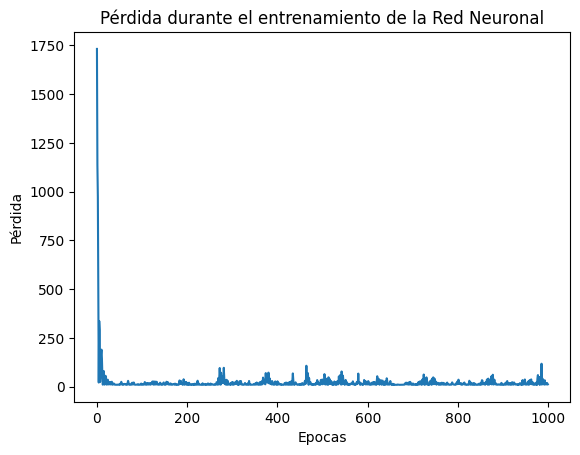

In [13]:
# Visualizar la pérdida del entrenamiento
plt.plot(historial.history['loss'])
plt.title('Pérdida durante el entrenamiento de la Red Neuronal')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.show()

## Funciones de Predicción para ML y DL

se crea una funcion llamada (predecir_reduccion) la cual nos retorna el resuldato de la prediccion de los modelos de ML y DL

In [14]:
# Función para predecir con ambos modelos
def predecir_reduccion(value):
    # Predicción con el modelo lineal
    pred_lineal = lineal_model.predict(np.array([[value]]))

    # Predicción con la red neuronal
    pred_neuronal = model_sequential.predict(np.array([[value]]))

    print(f"Predicción del modelo lineal para {value}: {pred_lineal[0]:.2f}")
    print(f"Predicción del modelo neuronal para {value}: {pred_neuronal[0][0]:.2f}")

# Predecir para 35 y otro valor
predecir_reduccion(35.0)
predecir_reduccion(70.0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicción del modelo lineal para 35.0: 35.22
Predicción del modelo neuronal para 35.0: 39.90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicción del modelo lineal para 70.0: 66.43
Predicción del modelo neuronal para 70.0: 75.20


### Interpretar Resultados

Modelo lineal:

El modelo lineal es consistente en su predicción, siguiendo una relación directa entre la reducción de sólidos y la demanda de oxígeno. A medida que aumenta el valor de la reducción de sólidos (de 35 a 70), el modelo predice un aumento proporcional en la demanda de oxígeno. Sin embargo, sus predicciones se ajustan de manera menos precisa a los valores extremos, sugiriendo que podría no capturar variaciones complejas.

Red neuronal:

 La red neuronal predice valores ligeramente más bajos en ambos casos, lo que indica que puede estar capturando patrones más sutiles en los datos. En particular, sugiere que en rangos más altos de reducción de sólidos (como en 70), el aumento en la demanda de oxígeno no es tan pronunciado, lo que puede reflejar una relación más compleja entre las variables.

-------------------------------------------------------------------------

## Conclusión

En este proyecto se desarrollaron dos modelos para predecir la demanda de oxígeno químico a partir de la reducción de sólidos. El modelo de Regresión Lineal demostró ser efectivo al capturar la relación lineal entre las variables, mientras que la Red Neuronal permitió identificar patrones más complejos. Ambos modelos son útiles, aunque la red neuronal podría ser más adecuada cuando la relación entre las variables no es lineal.

---------------------------------------------------------------------

# Redes Neuronales: Estructura, Aplicaciones y Evolución

### ¿Qué son las redes neuronales?

Las redes neuronales son un tipo de algoritmo de machine learning que imita el funcionamiento del cerebro humano. Utilizan neuronas artificiales interconectadas para aprender y modelar relaciones complejas entre datos de entrada y salida. Estas redes tienen la capacidad de tomar decisiones de manera automática y se aplican en diversas áreas como el reconocimiento de voz, la clasificación de imágenes y la predicción de comportamiento.

### Historia de las redes neuronales

Los orígenes de las redes neuronales se remontan a los años 40, cuando Warren McCulloch y Walter Pitts crearon el primer modelo de neurona artificial. En los años 50, Frank Rosenblatt desarrolló el perceptrón, un avance significativo que sentó las bases para redes neuronales más avanzadas. A lo largo de las décadas, con el progreso en la neurociencia y la tecnología, surgieron redes convolucionales y recurrentes, fundamentales en aplicaciones como la detección de fraudes y el diagnóstico médico.

### Funcionamiento de las redes neuronales

Inspiradas en el cerebro humano, las redes neuronales funcionan mediante neuronas artificiales interconectadas que reciben datos y producen una salida. Estas neuronas están organizadas en capas: una de entrada, una o más capas ocultas y una de salida. Durante el entrenamiento, se ajustan los pesos de las conexiones para mejorar la precisión del modelo en cada iteración.

### Tipos de redes neuronales

 - Redes neuronales prealimentadas: Procesan los datos en una única dirección.

 - Redes convolucionales: Usan retroalimentación para mejorar el análisis predictivo, siendo útiles en el procesamiento de imágenes.

 - Algoritmo de propagación: Se utiliza principalmente para la clasificación de imágenes.

### Funciones de activación

Las funciones de activación permiten a las redes neuronales modelar relaciones no lineales. Existen varias funciones, como:

 - Sigmoide: Para problemas de clasificación binaria.

 - ReLU: La más utilizada en redes neuronales modernas, ideal para redes profundas.

- Tangente hiperbólica: Útil en tareas de clasificación y regresión.

### Aplicaciones de las redes neuronales

Las redes neuronales son ampliamente utilizadas en múltiples campos:

 - Reconocimiento de patrones: En voz e imágenes, permiten la identificación de objetos o palabras.

 - Procesamiento del lenguaje natural: En traducción automática o generación de texto.

 - Visión por computadora: En la detección de objetos en tiempo real.

 - Predicción y toma de decisiones: En comercio electrónico o análisis de riesgos.

### Ventajas y desventajas

#### Ventajas
- La principal ventaja es la capacidad de las redes neuronales de capturar y obtener resultados con gran precisión.

- La información se procesa de forma local y todas las neuronas ofrecen una respuesta al mismo tiempo.

- Las neuronas tienen tolerancia a fallos.

- La red neuronal tiene capacidad de reconocer incluso los patrones que no han sido aprendidos.

#### Desventajas
- Necesitan un gran procesamiento de los datos.

- Su tiempo de aprendizaje es elevado.

- No son fácilmente explicables.

- El aprendizaje en el caso de grandes tareas es complejo.

### Futuro de las redes neuronales

El futuro de las redes neuronales se perfila como uno de los más prometedores dentro del campo de la inteligencia artificial. Su capacidad para abordar problemas complejos está en constante expansión, gracias a los continuos avances en algoritmos y hardware. Con nuevas investigaciones y desarrollos, las redes neuronales están encontrando aplicaciones cada vez más sofisticadas en áreas como la robótica, donde permiten la creación de máquinas más autónomas e inteligentes, y en la medicina, donde se utilizan para diagnósticos más precisos y tratamientos personalizados. Además, en la inteligencia artificial avanzada, están impulsando mejoras significativas en tareas como el procesamiento de lenguaje natural, la visión por computadora y la toma de decisiones en tiempo real. A medida que estas tecnologías se perfeccionan, el potencial de las redes neuronales para transformar industrias enteras es incalculable, abriendo la puerta a soluciones innovadoras en áreas que antes eran inalcanzables para los sistemas tradicionales.

